<a href="https://colab.research.google.com/github/avneesh-nolkha/EVA5/blob/master/Session9/EVA5_Assignment9UnModularized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
from torchvision import transforms
from torchvision.utils import make_grid
import logging 
logger=logging.getLogger() 

In [ ]:
!git clone https://github.com/smitasasindran/eva5utils.git
!git clone https://github.com/albumentations-team/albumentations.git
!git clone https://github.com/vickyliin/gradcam_plus_plus-pytorch.git

fatal: destination path 'eva5utils' already exists and is not an empty directory.
fatal: destination path 'albumentations' already exists and is not an empty directory.
fatal: destination path 'gradcam_plus_plus-pytorch' already exists and is not an empty directory.


In [ ]:
!ls
%cd eva5utils
!ls
from dataloaders import dataloaders
from model import Model7, ResNet18
from transforms import model7_transforms
from train import train_loop
from test import test_loop
from utils import plot_samples
from utils.helpers import show_model_summary, DEVICE, IS_CUDA, accuracy_per_class


albumentations	eva5utils  gradcam_plus_plus-pytorch  sample_data
/content/eva5utils
config	dataloaders  main.py  model  test  train  transforms  utils


In [ ]:
%cd ..
%cd albumentations
!ls
from albumentations.pytorch import transforms as P
from albumentations.augmentations import transforms as A
from albumentations.core import composition as C

/content
/content/albumentations
albumentations	black.toml    docs     MANIFEST.in  setup.cfg  tests
benchmark	conda.recipe  LICENSE  README.md    setup.py   tools


In [ ]:
%cd ..
%cd gradcam_plus_plus-pytorch
!ls
from gradcam import gradcam as G
from gradcam import utils as U

/content
/content/gradcam_plus_plus-pytorch
assets	example.ipynb  images	README.md  tox.ini
data	gradcam        outputs	setup.py


In [ ]:
# Constants, put in config
epochs = 100
cuda_batch_size=128
cpu_batch_size = 4
num_workers = 4

model = ResNet18()
show_model_summary(model.to(DEVICE), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Files already downloaded and verified
Files already downloaded and verified


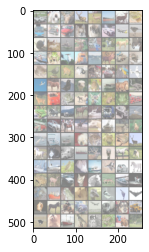

In [ ]:
def transformfun():
  transforms = C.Compose([
    A.HorizontalFlip(),
    A.RandomCrop(height=30, width=30, p=5.0),
    #A.Cutout(num_holes=1, max_h_size=16, max_w_size=16),
    P.ToTensor(dict (mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)))
    ])
  return lambda img: transforms(image = np.array(img))["image"]

def transformfunTest():
  transforms = C.Compose([
    P.ToTensor(dict (mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)))
    ])
  return lambda img: transforms(image = np.array(img))["image"]

#augmented_image = transformfun()

dataloader_args = dict(shuffle=True, batch_size=cuda_batch_size, num_workers=num_workers, pin_memory=True) if IS_CUDA else dict(shuffle=True, batch_size=cpu_batch_size)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transformfun())
trainloader = torch.utils.data.DataLoader(trainset, **dataloader_args)  

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transformfunTest())
testloader = torch.utils.data.DataLoader(testset, **dataloader_args)  

classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plot_samples(trainloader)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=30, gamma=.1)
train_loop(epochs, trainloader, model, DEVICE, optimizer, criterion, scheduler)

[1,   391] loss: 798.342
[2,   391] loss: 554.738
[3,   391] loss: 442.104
[4,   391] loss: 363.233
[5,   391] loss: 308.868
[6,   391] loss: 269.941
[7,   391] loss: 234.590
[8,   391] loss: 204.310
[9,   391] loss: 180.810
[10,   391] loss: 159.979
[11,   391] loss: 142.299
[12,   391] loss: 124.857
[13,   391] loss: 109.832
[14,   391] loss: 98.700
[15,   391] loss: 85.868
[16,   391] loss: 76.810
[17,   391] loss: 66.040
[18,   391] loss: 58.425
[19,   391] loss: 51.123
[20,   391] loss: 45.905
[21,   391] loss: 40.344
[22,   391] loss: 36.048
[23,   391] loss: 32.444
[24,   391] loss: 29.393
[25,   391] loss: 24.773
[26,   391] loss: 24.700
[27,   391] loss: 21.407
[28,   391] loss: 20.026
[29,   391] loss: 18.425
[30,   391] loss: 16.781
[31,   391] loss: 8.189
[32,   391] loss: 4.176
[33,   391] loss: 3.573
[34,   391] loss: 2.656
[35,   391] loss: 2.306
[36,   391] loss: 2.111
[37,   391] loss: 1.629
[38,   391] loss: 1.706
[39,   391] loss: 1.334
[40,   391] loss: 1.264
[41,  

In [ ]:
test_loop(testloader, model, DEVICE, criterion)
accuracy_per_class(model, classes, testloader, DEVICE)

Accuracy of the network on the 10000 test images: 87 %, Test loss: 56.06995531916618
Accuracy of plane : 86 %
Accuracy of   car : 100 %
Accuracy of  bird : 77 %
Accuracy of   cat : 78 %
Accuracy of  deer : 90 %
Accuracy of   dog : 65 %
Accuracy of  frog : 88 %
Accuracy of horse : 96 %
Accuracy of  ship : 90 %
Accuracy of truck : 88 %


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


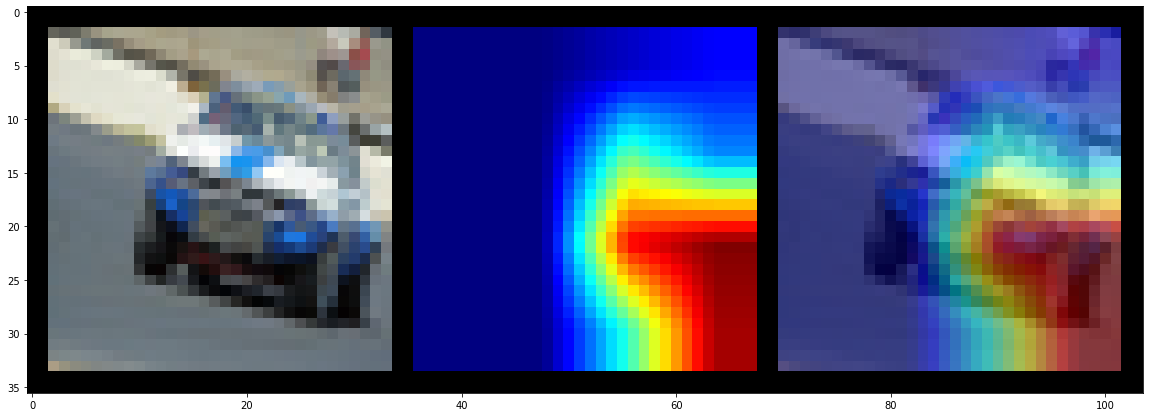

Prediction : car, Actual : car


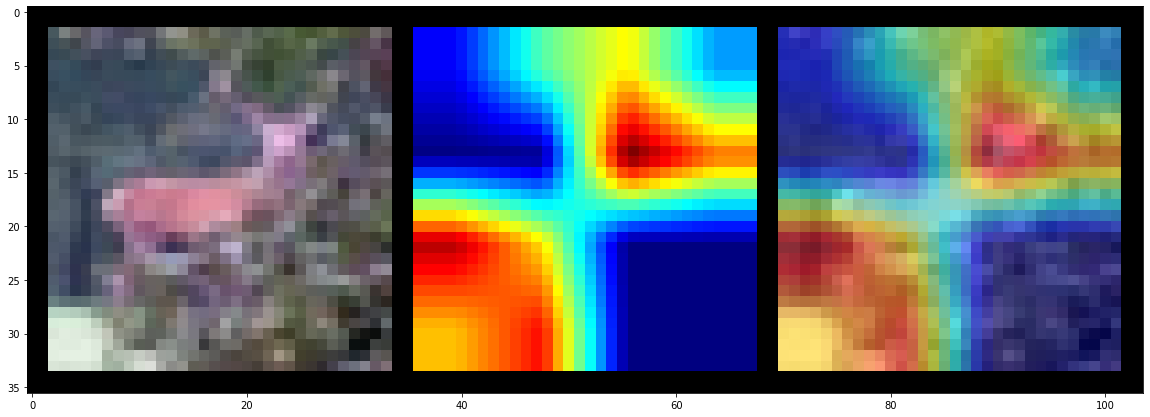

Prediction : deer, Actual : deer


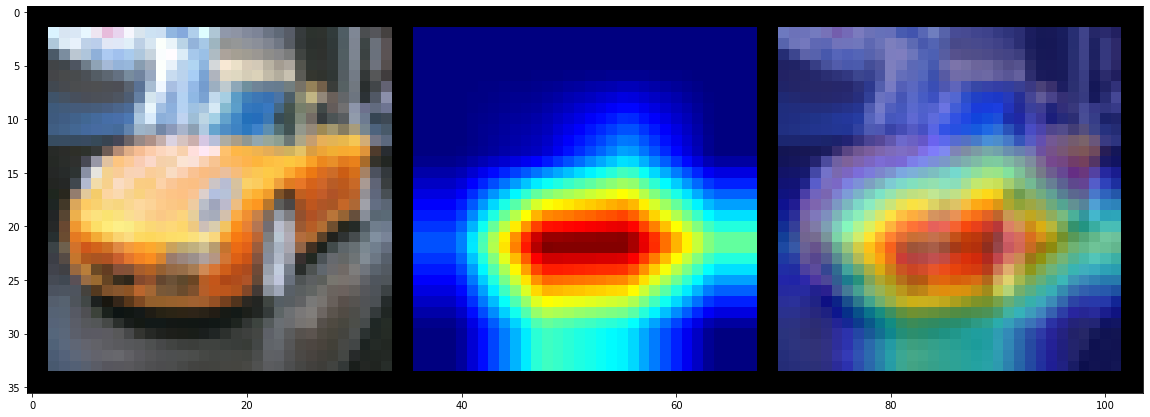

Prediction : car, Actual : car


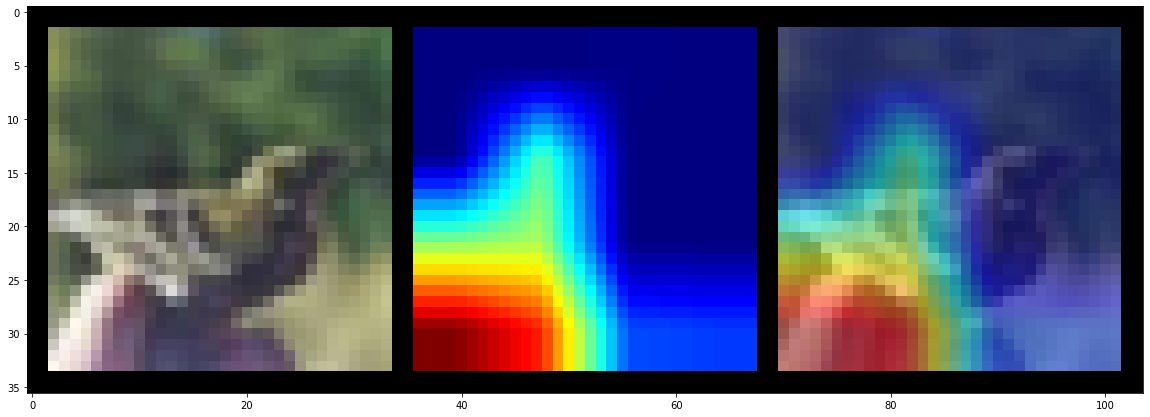

Prediction : frog, Actual : bird


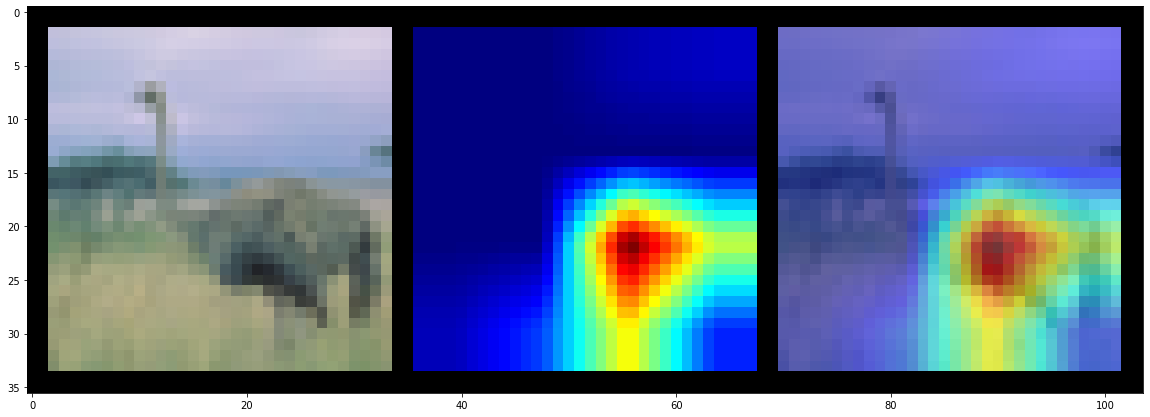

Prediction : bird, Actual : bird


In [ ]:
config = dict(model_type='resnet', arch=model, layer_name='layer4')
gradcam = G.GradCAM.from_config(**config)

dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = model(images.to(DEVICE))
_, predicted = torch.max(outputs.data, 1)

for i in range(5):
  imagestodisplay = []
  mask, _ = gradcam(images[i][np.newaxis,:].to(DEVICE))
  heatmap, result = U.visualize_cam(mask, images[i][np.newaxis,:])
  imagestodisplay.extend([images[i].cpu(), heatmap, result])
  grid_image = make_grid(imagestodisplay, nrow=3)
  plt.figure(figsize=(20,20))
  plt.imshow(np.transpose(grid_image, (1,2,0)))
  plt.show()
  print(f"Prediction : {classes[predicted[i]]}, Actual : {classes[labels[i]]}")

#transforms.ToPILImage()(grid_image)
